Here we can narrow the scope of the project by just looking at the top universities and colleges. These institutions have received over 100 awards, although this threshold may change if desired. By using filters, we can get data that contains these restrictions.

In [1]:
import xmlschema
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

nsf_data = pickle.load(open("nsf_data.pickle", "rb", -1))
nsf_df = pickle.load(open("nsf_df.pickle", "rb", -1))

Filter through the Institution to only contain Universities/Colleges/Institutes of Technology. Then filter to only retain institutions that have received more than 100 awards.

In [19]:
university_filter = r'University|College|Polytechnic Institute|Institute of the Arts|School of|Institute of Technology|CUNY|SUNY'
nsf_df_uni100 = nsf_df[nsf_df['Institution'].str.contains(university_filter) == True].groupby('Institution').filter(lambda x: len(x)>100)
#Correct the data for this single inconsistency
nsf_df_uni100 = nsf_df_uni100.replace('Ohio State University Research Foundation -DO NOT USE', 'Ohio State University')

In [5]:
nsf_df_uni100

,AwardID,AwardTitle,AwardEffectiveDate,AwardExpirationDate,AwardInstrument,MinAmdLetterDate,MaxAmdLetterDate,TRAN_TYPE,AwardAmount,AwardTotalIntnAmount,Directorate,Division,Institution,ProgramElement,ProgramReference
0,2124527,I-Corps: Neurologic assessment tool to identif...,2021-03-01,2021-08-31,Standard Grant,2021-03-19,2021-03-19,Grant,50000,50000.0,Directorate For Engineering,Div Of Industrial Innovation & Partnersh,Regents of the University of Michigan - Ann Arbor,"[{'Code': '8023', 'Text': 'I-Corps'}]","[{'Code': '5345', 'Text': 'BIOMEDICAL ENGINEER..."
1,2103832,Collaborative Research: ELEMENTS: Tuning-free ...,2021-05-01,2024-04-30,Standard Grant,2021-03-22,2021-03-22,Grant,259651,259651.0,Direct For Computer & Info Scie & Enginr,Office of Advanced Cyberinfrastructure (OAC),Worcester Polytechnic Institute,"[{'Code': '7726', 'Text': 'Data Cyberinfrastru...","[{'Code': '077Z', 'Text': 'CSSI-1: Cyberinfr f..."
3,2124533,Collaborative Research: EAGER: Understanding P...,2021-05-15,2022-04-30,Standard Grant,2021-05-05,2021-05-05,Grant,181157,181157.0,Direct For Computer & Info Scie & Enginr,Division Of Computer and Network Systems,Indiana University,"[{'Code': '8060', 'Text': 'Secure &Trustworthy...","[{'Code': '025Z', 'Text': 'SaTC: Secure and Tr..."
5,2123506,I-Corps: Ultra-Low-Cost Mechanical Ventilator ...,2021-04-01,2021-09-30,Standard Grant,2021-04-09,2021-04-09,Grant,50000,50000.0,Directorate For Engineering,Div Of Industrial Innovation & Partnersh,San Diego State University Foundation,"[{'Code': '8023', 'Text': 'I-Corps'}]","[{'Code': '096Z', 'Text': 'COVID-19 Research'}..."
6,2100334,Personalizing Math Instruction at Scale: A Met...,2021-09-01,2024-08-31,Standard Grant,2021-04-06,2021-04-06,Grant,817090,817090.0,Direct For Education and Human Resources,Division Of Research On Learning,Brown University,"[{'Code': '7980', 'Text': 'ECR-EHR Core Resear...","[{'Code': '8817', 'Text': 'STEM Learning & Lea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168234,1689,Collaborative Research on Updating the Militar...,2000-07-01,2003-06-30,Standard Grant,2000-07-07,2000-07-07,Grant,58425,58425.0,"Direct For Social, Behav & Economic Scie",Divn Of Social and Economic Sciences,University of Illinois at Urbana-Champaign,"[{'Code': '1371', 'Text': 'Political Science'}]","[{'Code': '0000', 'Text': 'UNASSIGNED'}, {'Cod..."
168235,79054,A Theoretical and Empirical Study of Internati...,2000-07-15,2004-08-31,Standard Grant,2000-07-21,2000-07-21,NaN,176792,176792.0,"Direct For Social, Behav & Economic Scie",Divn Of Social and Economic Sciences,Regents of the University of Michigan - Ann Arbor,"[{'Code': '1371', 'Text': 'Political Science'}]","[{'Code': '0000', 'Text': 'UNASSIGNED'}, {'Cod..."
168236,3920,Quantitative Analysis of the Semicircular Cana...,2001-02-15,2005-01-31,Continuing Grant,2001-02-09,2003-04-02,Grant,198468,195471.0,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,Pennsylvania State Univ University Park,"[{'Code': '1392', 'Text': 'Biological Anthropo...","[{'Code': '0000', 'Text': 'UNASSIGNED'}, {'Cod..."
168237,97833,REU Site: Summer Environmental Research Experi...,2001-06-01,2004-05-31,Continuing Grant,2001-06-23,2003-05-12,NaN,246145,246145.0,Directorate For Engineering,Div Of Engineering Education and Centers,Regents of the University of Idaho,"[{'Code': '1139', 'Text': 'RSCH EXPER FOR UNDE...","[{'Code': '9150', 'Text': 'EXP PROG TO STIM CO..."


Further data cleaning can be done by removing entries with AwardAmount of $1 or less, or AwardInstrument that have very few award counts.

In [25]:
nsf_df_uni100 = nsf_df_uni100[nsf_df_uni100['AwardAmount']>1]
nsf_df_uni100 = nsf_df_uni100.groupby('AwardInstrument').filter(lambda x: len(x)>50)

Plotting can reveal some relationship between an award feature and the award amount.

The longer the award duration, the more the award amount.

Text(0, 0.5, 'Award Amount')

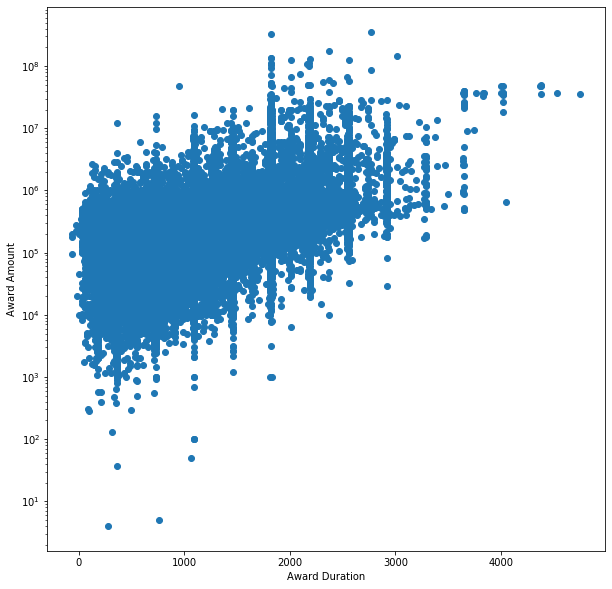

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot((nsf_df_uni100['AwardExpirationDate']-nsf_df_uni100['AwardEffectiveDate'])/np.timedelta64(1, 'D'), nsf_df_uni100['AwardAmount'],'o')
ax.set_yscale('log')
ax.set_xlabel('Award Duration')
ax.set_ylabel('Award Amount')

Different award instruments give different award amounts.

[Text(0, 0, 'Standard Grant'),
 Text(0, 0, 'Continuing Grant'),
 Text(0, 0, 'Cooperative Agreement'),
 Text(0, 0, 'Fellowship Award'),
 Text(0, 0, 'Continuing grant'),
 Text(0, 0, 'Fellowship')]

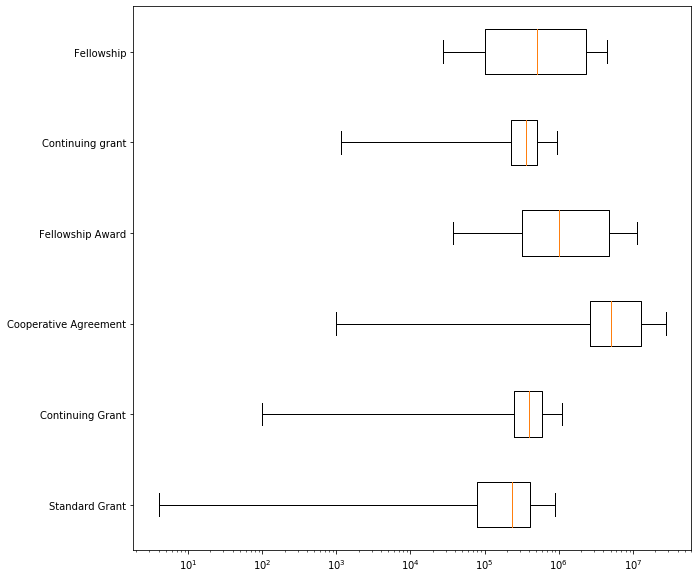

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
amount = []
for i in nsf_df_uni100['AwardInstrument'].unique():
    amount.append(nsf_df_uni100[nsf_df_uni100['AwardInstrument'] == i]['AwardAmount'])
ax.boxplot(amount, vert=False, showfliers=False)
ax.set_xscale('log')
ax.set_yticklabels(nsf_df_uni100['AwardInstrument'].unique())    